In [1]:
import torch
import numpy as np
from sklearn.decomposition import PCA 

In [2]:
from MyModel_EEC import RoBERTa, RoBERTa_vis
torch.hub._validate_not_a_forked_repo=lambda a,b,c: True

In [3]:
import os
os.environ['CUDA_VISIBLE_DEVICES']='1'

model = RoBERTa_vis()

Downloading: "https://github.com/pytorch/fairseq/archive/master.zip" to /home/weicheng/.cache/torch/hub/master.zip
2023-05-06 14:38:04 | INFO | fairseq.file_utils | loading archive file http://dl.fbaipublicfiles.com/fairseq/models/roberta.base.tar.gz from cache at /home/weicheng/.cache/torch/pytorch_fairseq/37d2bc14cf6332d61ed5abeb579948e6054e46cc724c7d23426382d11a31b2d6.ae5852b4abc6bf762e0b6b30f19e741aa05562471e9eb8f4a6ae261f04f9b350
2023-05-06 14:38:06 | INFO | fairseq.tasks.masked_lm | dictionary: 50264 types
2023-05-06 14:38:08 | INFO | fairseq.models.roberta.model | {'_name': None, 'common': {'_name': None, 'no_progress_bar': False, 'log_interval': 25, 'log_format': 'json', 'log_file': None, 'aim_repo': None, 'aim_run_hash': None, 'tensorboard_logdir': None, 'wandb_project': None, 'azureml_logging': False, 'seed': 1, 'cpu': False, 'tpu': False, 'bf16': False, 'memory_efficient_bf16': False, 'fp16': True, 'memory_efficient_fp16': True, 'fp16_no_flatten_grads': False, 'fp16_init_sca

Model Loaded.


In [29]:

model.load_state_dict(torch.load('/home/weicheng/NLU/NLU_debias/saves_roberta_in/RoBERTa_EL_oc_model_pt_epoch_18.pt', map_location='cpu'))

<All keys matched successfully>

In [30]:
# roberta = torch.hub.load('pytorch/fairseq', 'roberta.base')
roberta = model.roberta

In [31]:
text_male = 'he son his him father man boy himself male brother sons fathers men boys males brothers uncle uncles nephew nephews'
text_female = 'she daughter hers her mother woman girl herself female sister daughters mothers women girls females sisters aunt aunts niece nieces'

In [32]:
text_male = 'he son his him father man boy himself male brother'
text_female = 'she daughter hers her mother woman girl herself female sister'

In [33]:
text_male = text_male.split(' ')
text_female = text_female.split(' ')

new_ls=[ ]
for i in range(len(text_male)):
    new_ls.append(text_male[i] + ' ' + text_female[i])

# print(new_ls)
new_ls = ' '.join(new_ls)
print(new_ls)
# tokens = roberta.encode(text)
# print(roberta.decode(tokens))


he she son daughter his hers him her father mother man woman boy girl himself herself male female brother sister


In [34]:
tokens = roberta.encode(new_ls)
print(roberta.decode(tokens))
last_layer_features = roberta.extract_features(tokens)
print(last_layer_features.shape)

he she son daughter his hers him her father mother man woman boy girl himself herself male female brother sister
torch.Size([1, 22, 768])


In [35]:
last_layer_features[0:1, 1:-1].shape

torch.Size([1, 20, 768])

In [36]:
def doPCA(pairs, num_components=10):
    matrix = []
    for i in range(0, len(pairs)-1, 2):
        a = pairs[i]
        b = pairs[i+1]
    # for a, b in pairs:
        center = (a+b)/2
        matrix.append(a-center)
        matrix.append(b-center)
    matrix = np.array(matrix)
    pca = PCA(n_components=num_components)
    pca.fit(matrix)
    return pca

In [37]:
pca = doPCA(last_layer_features[0, 1:-1].detach().numpy(), 2)

In [38]:
pca.components_.shape

(2, 768)

In [39]:
import matplotlib.pyplot as plt

In [15]:
## TODO: 
# def ss_calculation(text_words):
    

In [40]:
text_words = 'joy sad pride'

emotion_word_dict= {'joy': ['ecstatic', 'excited', 'glad', 'happy', 'relieved'],
                    'sadness': ['depressed', 'devastated', 'disappointed', 'miserable', 'sad'],
                    'fear': ['anxious', 'discouraged', 'fearful', 'scared', 'terrified'],
                    'anger': ['angry', 'annoyed', 'enraged', 'furious', 'irritated']}

emotional_situation_word_dict= {'joy': ['amazing', 'funny', 'great', 'hilarious', 'wonderful'],
                                'sadness': ['depressing', 'gloomy', 'grim', 'heartbreaking', 'serious'],
                                'fear': ['dreadful', 'horrible', 'shocking', 'terrifying', 'threatening'],
                                'anger': ['annoying', 'displeasing', 'irritating', 'outrageous', 'vexing']}

text_words = [' angry', 'furious', 'irritated', 'enraged', 'annoyed', 'sad',
       'depressed', 'devastated', 'miserable', 'disappointed',
       'terrified', 'discouraged', 'scared', 'anxious', 'fearful',
       'happy', 'ecstatic', 'glad', 'relieved', 'excited', 
       'irritating', 'outrageous', 'annoying',
       'depressing', 'serious', 'grim', 'heartbreaking', 'gloomy',
       'horrible', 'threatening', 'terrifying', 'shocking', 'dreadful',
       'funny', 'hilarious', 'amazing', 'wonderful', 'great']

# 'vexing', 'displeasing'

print(len(text_words))
text_words = ' '.join(text_words)
# for i in range(len(text_words)):
# word = text_words[i]
tokens = roberta.encode(text_words)
print(len(tokens))
# print(roberta.decode(tokens))
print([roberta.decode(t.unsqueeze(0)) for t in tokens])
# print(roberta.decode(tokens))
last_layer_features = roberta.extract_features(tokens)

38
40
['', ' angry', ' furious', ' irritated', ' enraged', ' annoyed', ' sad', ' depressed', ' devastated', ' miserable', ' disappointed', ' terrified', ' discouraged', ' scared', ' anxious', ' fearful', ' happy', ' ecstatic', ' glad', ' relieved', ' excited', ' irritating', ' outrageous', ' annoying', ' depressing', ' serious', ' grim', ' heartbreaking', ' gloomy', ' horrible', ' threatening', ' terrifying', ' shocking', ' dreadful', ' funny', ' hilarious', ' amazing', ' wonderful', ' great', '']


In [41]:
tens = torch.tensor([0, 5800, 0])
print([roberta.decode(t.unsqueeze(0)) for t in tens])

['', ' angry', '']


In [42]:
last_layer_features.shape

torch.Size([1, 40, 768])

In [43]:
new_word = last_layer_features[:, 1:-1, :]

In [45]:
x_axis, y_axis = pca.components_

In [46]:
print(x_axis.shape)
print(new_word.shape)

(768,)
torch.Size([1, 38, 768])


In [47]:
proj_x = torch.matmul(new_word, torch.tensor(x_axis).unsqueeze(1))/torch.norm(torch.tensor(x_axis))

In [48]:
proj_x.shape
proj_x = proj_x.squeeze().detach().numpy()

In [49]:
proj_y = torch.matmul(new_word, torch.tensor(y_axis).unsqueeze(1))/torch.norm(torch.tensor(y_axis))

In [50]:
proj_y.shape
proj_y = proj_y.squeeze().detach().numpy()

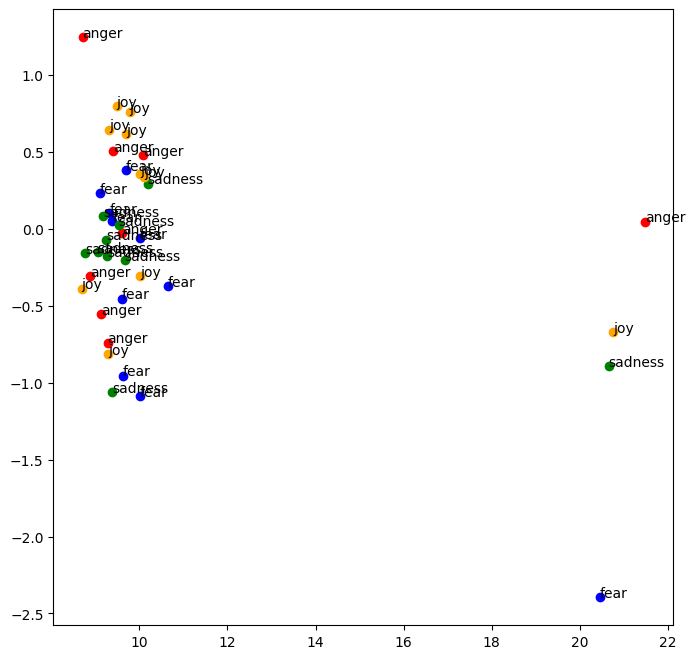

In [27]:
# plt.scatter(proj_x.squeeze().detach().numpy(), proj_y.squeeze().detach().numpy(), 
#             )
reversed = {'ecstatic': 'joy',
 'excited': 'joy',
 'glad': 'joy',
 'happy': 'joy',
 'relieved': 'joy',
 'depressed': 'sadness',
 'devastated': 'sadness',
 'disappointed': 'sadness',
 'miserable': 'sadness',
 'sad': 'sadness',
 'anxious': 'fear',
 'discouraged': 'fear',
 'fearful': 'fear',
 'scared': 'fear',
 'terrified': 'fear',
 'angry': 'anger',
 'annoyed': 'anger',
 'enraged': 'anger',
 'furious': 'anger',
 'irritated': 'anger',
 'amazing': 'joy',
 'funny': 'joy',
 'great': 'joy',
 'hilarious': 'joy',
 'wonderful': 'joy',
 'depressing': 'sadness',
 'gloomy': 'sadness',
 'grim': 'sadness',
 'heartbreaking': 'sadness',
 'serious': 'sadness',
 'dreadful': 'fear',
 'horrible': 'fear',
 'shocking': 'fear',
 'terrifying': 'fear',
 'threatening': 'fear',
 'annoying': 'anger',
 'displeasing': 'anger',
 'irritating': 'anger',
 'outrageous': 'anger',
 'vexing': 'anger'}

color = {'fear':'blue', 'anger':'red', 'sadness':'green', 'joy':'orange'}

text_words = ['angry', 'furious', 'irritated', 'enraged', 'annoyed', 'sad',
       'depressed', 'devastated', 'miserable', 'disappointed',
       'terrified', 'discouraged', 'scared', 'anxious', 'fearful',
       'happy', 'ecstatic', 'glad', 'relieved', 'excited', 
       'irritating', 'outrageous', 'annoying',
       'depressing', 'serious', 'grim', 'heartbreaking', 'gloomy',
       'horrible', 'threatening', 'terrifying', 'shocking', 'dreadful',
       'funny', 'hilarious', 'amazing', 'wonderful', 'great']

fig, ax = plt.subplots(figsize=(8, 8))
# ax.scatter(proj_x, proj_y, 
#             )
for i, txt in enumerate(text_words):
    ax.annotate(reversed[txt], (proj_x[i], proj_y[i]))
    ax.scatter(proj_x[i], proj_y[i], c=[color[reversed[txt]],])

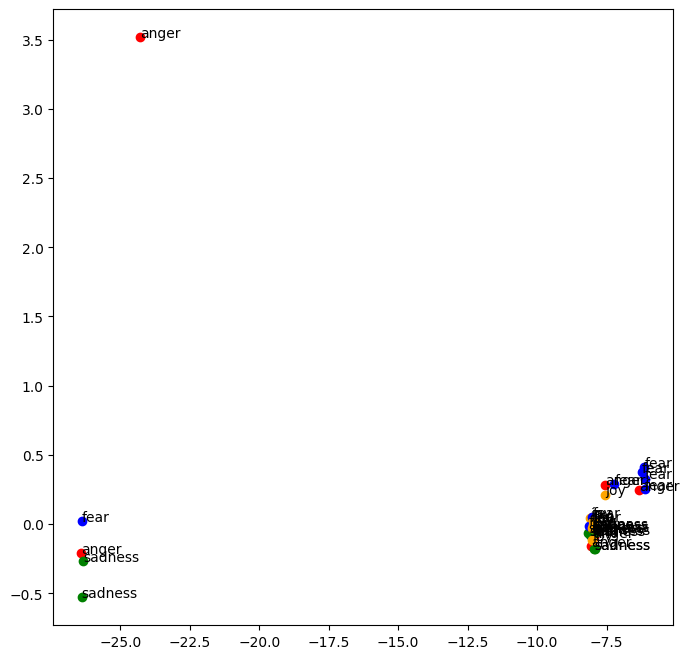

In [52]:
# plt.scatter(proj_x.squeeze().detach().numpy(), proj_y.squeeze().detach().numpy(), 
#             )
reversed = {'ecstatic': 'joy',
 'excited': 'joy',
 'glad': 'joy',
 'happy': 'joy',
 'relieved': 'joy',
 'depressed': 'sadness',
 'devastated': 'sadness',
 'disappointed': 'sadness',
 'miserable': 'sadness',
 'sad': 'sadness',
 'anxious': 'fear',
 'discouraged': 'fear',
 'fearful': 'fear',
 'scared': 'fear',
 'terrified': 'fear',
 'angry': 'anger',
 'annoyed': 'anger',
 'enraged': 'anger',
 'furious': 'anger',
 'irritated': 'anger',
 'amazing': 'joy',
 'funny': 'joy',
 'great': 'joy',
 'hilarious': 'joy',
 'wonderful': 'joy',
 'depressing': 'sadness',
 'gloomy': 'sadness',
 'grim': 'sadness',
 'heartbreaking': 'sadness',
 'serious': 'sadness',
 'dreadful': 'fear',
 'horrible': 'fear',
 'shocking': 'fear',
 'terrifying': 'fear',
 'threatening': 'fear',
 'annoying': 'anger',
 'displeasing': 'anger',
 'irritating': 'anger',
 'outrageous': 'anger',
 'vexing': 'anger'}

text_words = ['angry', 'furious', 'irritated', 'enraged', 'annoyed', 'sad',
       'depressed', 'devastated', 'miserable', 'disappointed',
       'terrified', 'discouraged', 'scared', 'anxious', 'fearful',
       'happy', 'ecstatic', 'glad', 'relieved', 'excited', 
       'irritating', 'outrageous', 'annoying',
       'depressing', 'serious', 'grim', 'heartbreaking', 'gloomy',
       'horrible', 'threatening', 'terrifying', 'shocking', 'dreadful',
       'funny', 'hilarious', 'amazing', 'wonderful', 'great']

# fig, ax = plt.subplots(figsize=(15, 15))

# proj_x = (proj_x - proj_x.min()) / (proj_x.max() - proj_x.min())
# proj_y = (proj_y - proj_y.min()) / (proj_y.max() - proj_y.min())

fig, ax = plt.subplots(figsize=(8, 8))
# ax.scatter(proj_x, proj_y, 
#             )
for i, txt in enumerate(text_words):
    ax.annotate(reversed[txt], (proj_x[i], proj_y[i]))
    ax.scatter(proj_x[i], proj_y[i], c=[color[reversed[txt]],])

In [3]:
import pickle 
import MyData_NER
import bert_serving
import bert_serving.client
import transformers 
import pandas as pd

In [10]:
with open('/home/weicheng/NLU/NLU_debias/saves/RoBERTa_EL_oc_epoch_20.pkl', 'rb') as f:
  output = pickle.load(f)

In [11]:
print(len(output))

5


In [12]:
optimal_result = output[0]

In [13]:
test_factual_dict= {'text': [], 'label': list(optimal_result['actual_y'])\
            , 'true_labels': list(optimal_result['true_labels'])\
            , 'anger': [], 'fear': [], 'joy': [], 'sadness': []} 
for input in optimal_result['actual_x']:
  test_factual_dict['text'].append(' '.join(input.split('____')[:-1])+'.')

for input in optimal_result['factual_outputs']: 
  test_factual_dict['anger'].append(input[0]) 
  test_factual_dict['fear'].append(input[1]) 
  test_factual_dict['joy'].append(input[2]) 
  test_factual_dict['sadness'].append(input[3]) 

test_factual_dt= pd.DataFrame(test_factual_dict) 

In [14]:
test_factual_dt

,text,label,true_labels,anger,fear,joy,sadness
0,alonzo feels.,anger,0,-0.111231,0.153536,-0.136789,-0.151701
1,alonzo feels.,anger,0,-0.111230,0.153540,-0.136786,-0.151704
2,alonzo feels.,anger,0,-0.111224,0.153541,-0.136784,-0.151700
3,alonzo feels.,anger,0,-0.111227,0.153538,-0.136794,-0.151705
4,alonzo feels.,anger,0,-0.111222,0.153542,-0.136792,-0.151700
...,...,...,...,...,...,...,...
5595,the conversation with ellen was.,joy,2,-0.111228,0.153538,-0.136786,-0.151697
5596,the conversation with ellen was.,joy,2,-0.111229,0.153539,-0.136787,-0.151695
5597,the conversation with ellen was.,joy,2,-0.111229,0.153540,-0.136793,-0.151705
5598,the conversation with ellen was.,joy,2,-0.111225,0.153544,-0.136784,-0.151701


In [17]:
test_counterfactual_dict= {'text': [], 'label': list(optimal_result['actual_y'])\
            , 'true_labels': list(optimal_result['true_labels'])\
            , 'anger': [], 'fear': [], 'joy': [], 'sadness': []}
for input in optimal_result['actual_x']:
  test_counterfactual_dict['text'].append(' '.join(input.split('____'))+'.')

for input in optimal_result['counterfactual_outputs']:
  test_counterfactual_dict['anger'].append(input[0]) 
  test_counterfactual_dict['fear'].append(input[1]) 
  test_counterfactual_dict['joy'].append(input[2]) 
  test_counterfactual_dict['sadness'].append(input[3]) 

test_counterfactual_dt= pd.DataFrame(test_counterfactual_dict)


In [18]:
test_counterfactual_dt

,text,label,true_labels,anger,fear,joy,sadness
0,alonzo feels angry..,anger,0,-1.314282e-05,-1.104176e-05,-6.020069e-06,-5.543232e-06
1,alonzo feels furious..,anger,0,-1.180172e-05,-6.720424e-06,-3.129244e-06,-8.836389e-06
2,alonzo feels irritated..,anger,0,-5.543232e-06,-5.483627e-06,-9.238720e-07,-4.157424e-06
3,alonzo feels enraged..,anger,0,-9.119511e-06,-8.508563e-06,-1.080334e-05,-9.477139e-06
4,alonzo feels annoyed..,anger,0,-3.382564e-06,-4.515052e-06,-8.538365e-06,-4.321337e-06
...,...,...,...,...,...,...,...
5595,the conversation with ellen was funny..,joy,2,-1.311302e-06,-6.690621e-06,-7.584691e-06,-5.960464e-07
5596,the conversation with ellen was hilarious..,joy,2,-1.952052e-06,-6.064773e-06,-9.134412e-06,1.415610e-06
5597,the conversation with ellen was amazing..,joy,2,-1.683831e-06,-4.261732e-06,-1.510978e-05,-8.940697e-06
5598,the conversation with ellen was wonderful..,joy,2,2.294779e-06,-7.748604e-07,-6.139278e-06,-4.857779e-06
